In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
sns.set_style('darkgrid')
import warnings
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import imageio
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
plt.style.use('seaborn-darkgrid')

# First part

In [154]:
ODI = pd.read_csv('ODI.csv')

In [155]:
ODI.columns=['major','machine','infor','statistics'
             ,'database','gender','choco','birthday','neighbors','stand','stress','money','random','bed','good1','good2']

In [254]:
kkk=pd.read_csv('ODI.csv')
kkk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 16 columns):
What programme are you in?                                                                                                                                                                         280 non-null object
Have you taken a course on machine learning?                                                                                                                                                       280 non-null object
Have you taken a course on information retrieval?                                                                                                                                                  280 non-null object
Have you taken a course on statistics?                                                                                                                                                             280 non-null object
Have you taken a course on database

In [250]:
ODI.gender.value_counts()

male       158
female     118
unknown      4
Name: gender, dtype: int64

# Major

In [157]:
ODI['major']=ODI['major'].apply(lambda x:x.split())

In [158]:
w={'Artificial':'AI','AI':'AI','Computational':'Computational','CLS':'Computational',
   'computational':'Computational','Computer':'CS','computer':'CS','cs':'CS','CS':'CS','Data':'CS','data':'CS',
  'Finance':'Finance','Quantitative':'Finance','quantitative':'Finance','finance':'Finance','QRM':'Finance','qrm':'Finance','Bioinformatics':'Bioinformatics',
  'Econometrics':'Econometrics','econometrics':
   'Econometrics','bioinformatics':'Bioinformatics',
   'Information':'Information','information':'Information','Business':'BA','business':'BA','BA':'BA'}
hlist=['AI','BA','CS','Computational','Econometrics','Finance','Bioinformatics','Information']

In [159]:
for k,i in enumerate(ODI['major']):
    for h in ODI['major'][k]:
        if h in w:
            ODI['major'][k]=w[h]
            break
for k,i in enumerate(ODI['major']):
    if i not in hlist:
        ODI['major'][k]='others'


# Subject

In [160]:
ODI['machine'] = ODI['machine'].map({'yes':1, 'no':0,'unknown':2})
ODI['statistics'] = ODI['statistics'].map({'mu':1, 'sigma':0,'unknown':2})
ODI['infor'] = ODI['infor'].map({'1':1,'0':0,'unknown':2})
ODI['database'] = ODI['database'].map({'ja':1, 'nee':0,'unknown':2})

In [189]:
ODI.machine.value_counts('1')[1]

0.6357142857142857

In [192]:
knowlist=[ODI.machine.value_counts('1')[1],ODI.statistics.value_counts('1')[1],ODI.infor.value_counts('1')[1],ODI.database.value_counts('1')[1]]
knowlist

[0.6357142857142857,
 0.8607142857142858,
 0.28214285714285714,
 0.5142857142857142]

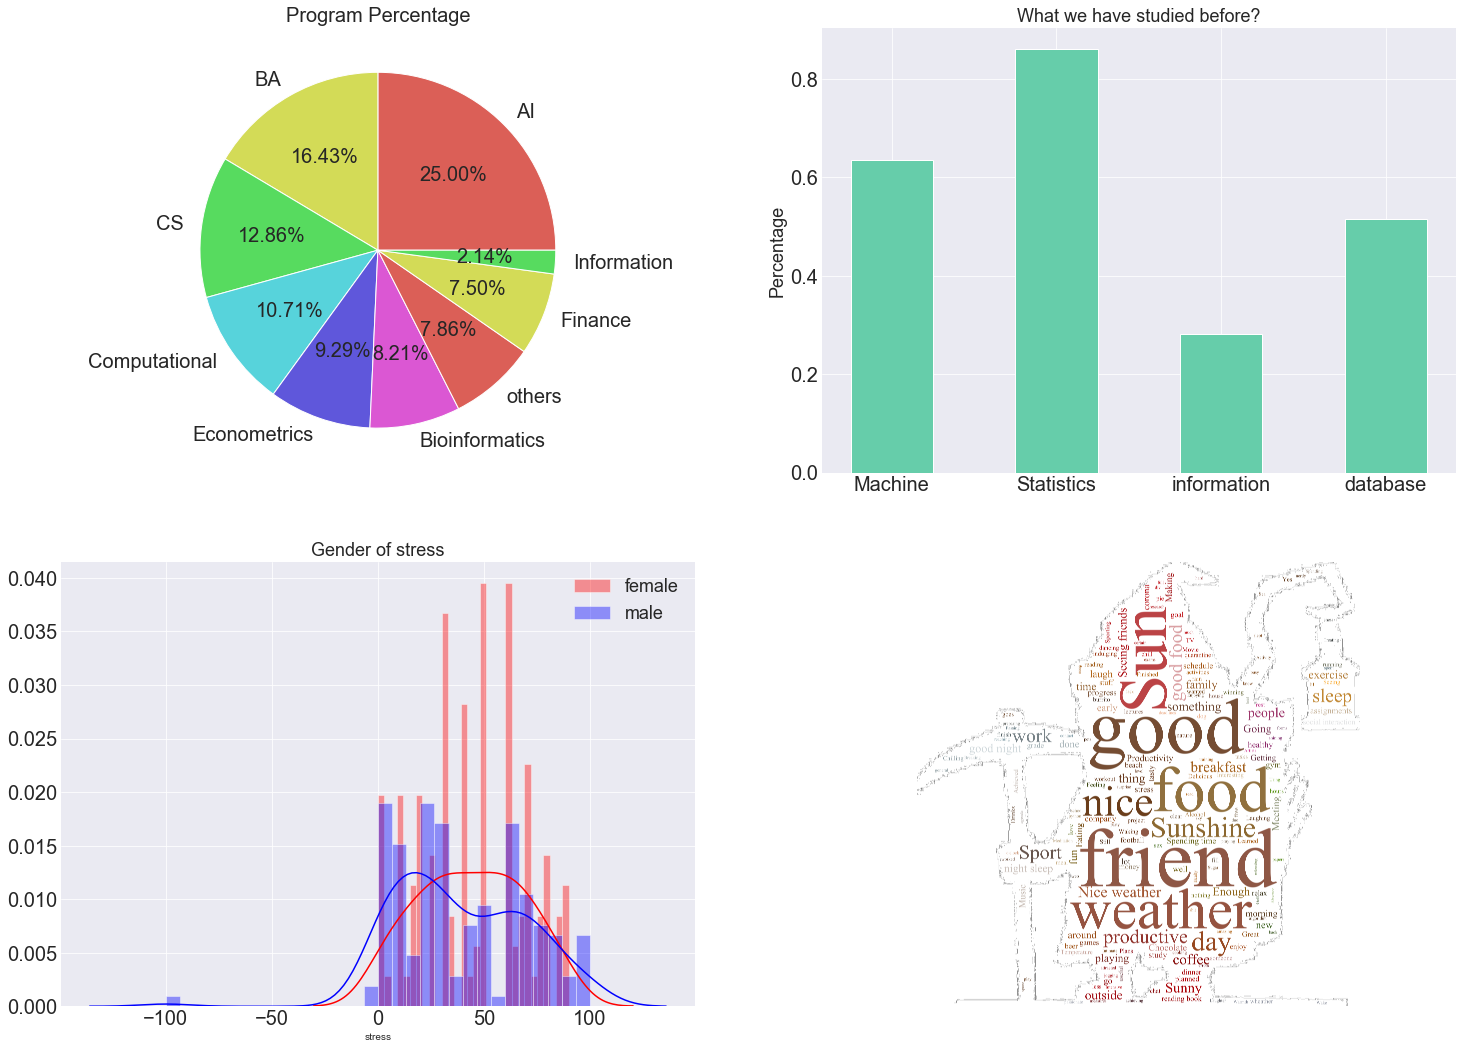

In [318]:
fig = plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
patches,l_text,p_text=plt.pie(ODI['major'].value_counts(),labels=ODI['major'].value_counts().index,autopct='%1.2f%%')
# ODI['major'].value_counts().plot(kind='pie')
plt.title('Program Percentage',size=20)
for t in l_text:
    t.set_size(20)
for t in p_text:
    t.set_size(20)
plt.subplot(2,2,2)
plt.bar(['Machine','Statistics','information','database'],knowlist,color='#66CDAA',width=0.5)
plt.ylabel('Percentage',size=18)
plt.tick_params(labelsize = 20)
plt.title('What we have studied before?',size=18)
plt.subplot(2,2,3)
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(ODI.stress[ODI['gender']=='female'],color="r",bins=30,kde=True,label='female')
sns.distplot(ODI.stress[ODI['gender']=='male'],color="b",bins=30,kde=True,label='male')
plt.legend(fontsize=18)
plt.title('Gender of stress',size=18)
plt.tick_params(labelsize = 20)
plt.subplot(2,2,4)
unique_string=(" ").join(cloud)
wordcloud = WordCloud(width=1000,
                        height=700,
                        mask=mk,
                      font_path='./datamining1/assignment1/TimesNewRoman.ttf',
                      background_color='white',
                      contour_width=3, contour_color='black',
                        scale=15).generate(unique_string)
image_colors = ImageColorGenerator(mk)
# plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("1.111"+".png", bbox_inches='tight')
plt.show()

# stress

In [197]:
def convert_currency(value):
    new_value = value.replace('0,5', ' 1').replace('8-100','50 ').replace('-','0')
    return np.float(new_value)

# ODI['stress'].apply(convert_currency)

ODI['stress'] = ODI['stress'].astype('float')


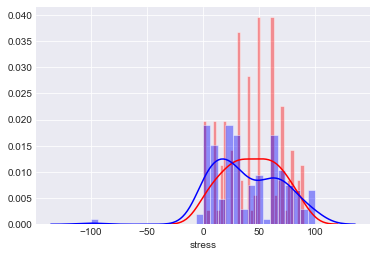

In [210]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas
sns.set_palette("hls") #设置所有图的颜色，使用hls色彩空间
sns.distplot(ODI.stress[ODI['gender']=='female'],color="r",bins=30,kde=True)
sns.distplot(ODI.stress[ODI['gender']=='male'],color="b",bins=30,kde=True)
plt.show()

# wordcolud

In [220]:
goodlist=[]
for i in range(len(ODI['good1'])):
    goodlist.append(ODI['good1'][i])
    goodlist.append(ODI['good2'][i])
def test_filter(k):
    str = k
    str_list = str.split()
    return (str_list)

In [232]:
cloud=[]
for i in range(len(goodlist)):
    h=test_filter(goodlist[i])
    for k in h:
        cloud.append(k)
mk = imageio.imread("./datamining1/assignment1/miner.jpg")

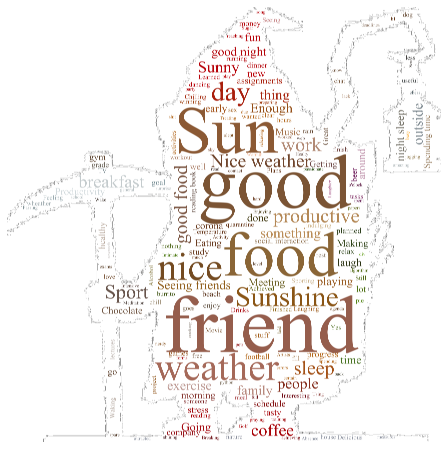

In [234]:
unique_string=(" ").join(cloud)
wordcloud = WordCloud(width=1000,
                        height=700,
                        mask=mk,
                      font_path='./datamining1/assignment1/TimesNewRoman.ttf',
                      background_color='white',
                      contour_width=3, contour_color='black',
                        scale=15).generate(unique_string)
image_colors = ImageColorGenerator(mk)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
# plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()

# 1.2

In [12]:
import nltk
from nltk.corpus import movie_reviews

# Loading movie review

In [22]:
df_movie=pd.DataFrame(columns = ['Number','Attitute','Content','Score']) 
df_movie['Number']=np.arange(0,2000,1)
df_movie.loc[np.arange(0,1000,1),'Attitute']=0
df_movie.loc[np.arange(1000,2000,1),'Attitute']=1

In [23]:
import os
import codecs
import glob
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/neg')

def txtcombine(df):
    
    files = glob.glob('*.txt')
    z=0
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine(df_movie)
os.getcwd()
os.chdir('/Users/hernando/Desktop/NLP/NLP_tech_module1/SentimentExperiment/review_polarity_data/pos')

def txtcombine_2(df):
    
    files = glob.glob('*.txt')
    z=1000
    for filename in files:
        kkk=open(filename,'r')
        url=kkk.read().replace('\n','') 
        df.loc[z, 'Content'] = url
        kkk.close()
        z=z+1
txtcombine_2(df_movie)

In [24]:
df_movie.head()

,Number,Attitute,Content,Score
0,0,0,bad . bad . bad . that one word seems to prett...,NaN
1,1,0,isn't it the ultimate sign of a movie's cinema...,NaN
2,2,0,""" gordy "" is not a movie , it is a 90-minute-...",NaN
3,3,0,disconnect the phone line . don't accept the c...,NaN
4,4,0,when robert forster found himself famous again...,NaN


# LogisticRegression training

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_movie.Content.values, df_movie.Attitute.values,
                                                    stratify=df_movie.Attitute.values, test_size=0.2,
                                                    random_state=50)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [27]:
import sklearn
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score   
# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# for train, test in kfold.split(df_movie.Content.values):
#     classifier = LogisticRegression() 
#     training_vec = vector.fit_transform(df_movie.Content.values[train])
#     clf=classifier.fit(training_vec,df_movie.Attitute[train])
#     evaluation_vector = vector.transform(df_movie.Content.values[test])
#     print(clf.score(evaluation_vector, df_movie.Attitute[test]))

# LogisticRegression cross+predict

In [28]:
from sklearn import svm

vector = TfidfVectorizer()
param = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize, None],
               'clf__C': [1.0, 10.0, 100.0]}
             ]

lr = Pipeline([('vect', vector),
                     ('clf', LogisticRegression(random_state=10))])

log = GridSearchCV(lr, param,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

log.fit(X_train, y_train)

# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# classifier0 = svm.LinearSVC() 
# training_vec = vector.fit_transform(df_movie.Content.values)
# linear=cross_val_score(classifier0, training_vec, df_movie.Attitute.values, cv=kfold)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.3min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [29]:
 LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
log.best_params_

{'clf__C': 10.0,
 'vect__stop_words': ['إذ',
  'إذا',
  'إذما',
  'إذن',
  'أف',
  'أقل',
  'أكثر',
  'ألا',
  'إلا',
  'التي',
  'الذي',
  'الذين',
  'اللاتي',
  'اللائي',
  'اللتان',
  'اللتيا',
  'اللتين',
  'اللذان',
  'اللذين',
  'اللواتي',
  'إلى',
  'إليك',
  'إليكم',
  'إليكما',
  'إليكن',
  'أم',
  'أما',
  'أما',
  'إما',
  'أن',
  'إن',
  'إنا',
  'أنا',
  'أنت',
  'أنتم',
  'أنتما',
  'أنتن',
  'إنما',
  'إنه',
  'أنى',
  'أنى',
  'آه',
  'آها',
  'أو',
  'أولاء',
  'أولئك',
  'أوه',
  'آي',
  'أي',
  'أيها',
  'إي',
  'أين',
  'أين',
  'أينما',
  'إيه',
  'بخ',
  'بس',
  'بعد',
  'بعض',
  'بك',
  'بكم',
  'بكم',
  'بكما',
  'بكن',
  'بل',
  'بلى',
  'بما',
  'بماذا',
  'بمن',
  'بنا',
  'به',
  'بها',
  'بهم',
  'بهما',
  'بهن',
  'بي',
  'بين',
  'بيد',
  'تلك',
  'تلكم',
  'تلكما',
  'ته',
  'تي',
  'تين',
  'تينك',
  'ثم',
  'ثمة',
  'حاشا',
  'حبذا',
  'حتى',
  'حيث',
  'حيثما',
  'حين',
  'خلا',
  'دون',
  'ذا',
  'ذات',
  'ذاك',
  'ذان',
  'ذانك',
  'ذلك',
  'ذلكم',


In [30]:
clf_logis = log.best_estimator_
prediction_1=clf_logis.predict(X_test)
print('Accuracy, F1',clf_logis.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_1))

Accuracy, F1 0.8675 0.8684863523573201


# SVM cross+predict

In [32]:
from sklearn import svm

vector_1 = TfidfVectorizer()
param_1 = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize, None],
               'clf__C': [1.0, 10.0, 100.0]},
#               {
#                'vect__stop_words': [stopwords.words(), None],
#                'vect__tokenizer': [word_tokenize, None],
#                'clf__C': [1.0, 10.0, 100.0]},
             ]

lr_1 = Pipeline([('vect', vector_1),
                     ('clf', svm.LinearSVC()) ])

svm = GridSearchCV(lr_1, param_1,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

svm.fit(X_train, y_train)

# kfold = sklearn.model_selection.KFold(n_splits=10)
# vector = CountVectorizer(min_df=1,tokenizer=word_tokenize,stop_words=stopwords.words())
# classifier1 = LogisticRegression() 
# training_vec = vector.fit_transform(df_movie.Content.values)
# cross_val_score(classifier1, training_vec, df_movie.Attitute.values, cv=kfold)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.4min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [33]:
svm.best_params_

{'clf__C': 1.0,
 'vect__stop_words': ['إذ',
  'إذا',
  'إذما',
  'إذن',
  'أف',
  'أقل',
  'أكثر',
  'ألا',
  'إلا',
  'التي',
  'الذي',
  'الذين',
  'اللاتي',
  'اللائي',
  'اللتان',
  'اللتيا',
  'اللتين',
  'اللذان',
  'اللذين',
  'اللواتي',
  'إلى',
  'إليك',
  'إليكم',
  'إليكما',
  'إليكن',
  'أم',
  'أما',
  'أما',
  'إما',
  'أن',
  'إن',
  'إنا',
  'أنا',
  'أنت',
  'أنتم',
  'أنتما',
  'أنتن',
  'إنما',
  'إنه',
  'أنى',
  'أنى',
  'آه',
  'آها',
  'أو',
  'أولاء',
  'أولئك',
  'أوه',
  'آي',
  'أي',
  'أيها',
  'إي',
  'أين',
  'أين',
  'أينما',
  'إيه',
  'بخ',
  'بس',
  'بعد',
  'بعض',
  'بك',
  'بكم',
  'بكم',
  'بكما',
  'بكن',
  'بل',
  'بلى',
  'بما',
  'بماذا',
  'بمن',
  'بنا',
  'به',
  'بها',
  'بهم',
  'بهما',
  'بهن',
  'بي',
  'بين',
  'بيد',
  'تلك',
  'تلكم',
  'تلكما',
  'ته',
  'تي',
  'تين',
  'تينك',
  'ثم',
  'ثمة',
  'حاشا',
  'حبذا',
  'حتى',
  'حيث',
  'حيثما',
  'حين',
  'خلا',
  'دون',
  'ذا',
  'ذات',
  'ذاك',
  'ذان',
  'ذانك',
  'ذلك',
  'ذلكم',
 

In [570]:
svm_1 = svm.best_estimator_
prediction_2=svm_1.predict(X_test)
svm_1.score(X_test, y_test)
print('Accuracy, F1',svm_1.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_2))

Accuracy, F1 0.87 0.8712871287128714


# Part2

In [256]:
train = pd.read_csv('./datamining1/assignment1/titanic/train.csv')
test = pd.read_csv('./datamining1/assignment1/titanic/test.csv')

In [257]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [258]:
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['PassengerId']
PassengerId = test['PassengerId']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("PassengerId", axis = 1, inplace = True)
test.drop("PassengerId", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (891, 12) 
The test data size before dropping Id feature is : (418, 11) 

The train data size after dropping Id feature is : (891, 11) 
The test data size after dropping Id feature is : (418, 10) 


In [259]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [260]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB


In [261]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 32.7+ KB


In [262]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.Survived.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 10)


In [263]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


Text(0.5, 1.0, 'Percent missing data by feature')

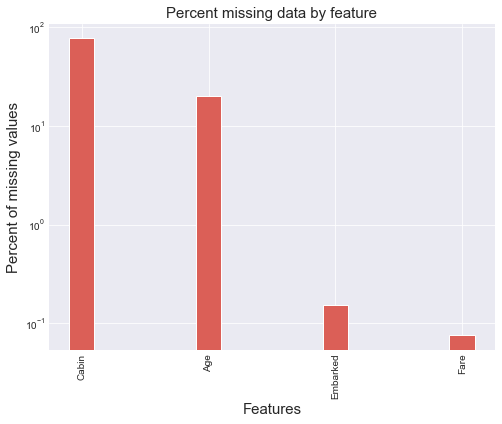

In [264]:
f, ax = plt.subplots(figsize=(8, 6))
plt.xticks(rotation='90')
plt.bar(x=all_data_na.index, height=all_data_na,width=0.2)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.yscale('log')
plt.title('Percent missing data by feature', fontsize=15)

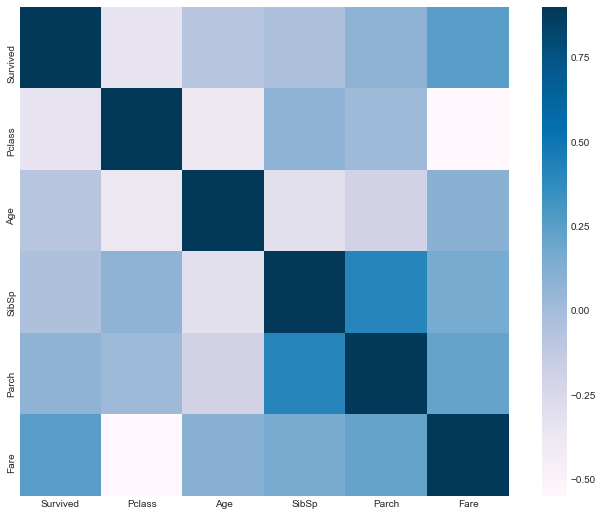

In [265]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True,cmap='PuBu')

In [266]:
print(df_dead,df_alived)

NameError: name 'df_dead' is not defined

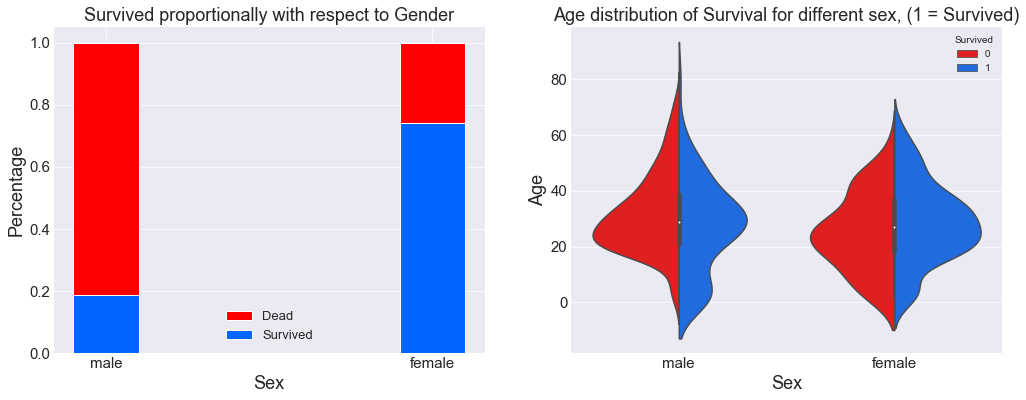

In [267]:
fig = plt.figure(figsize=(17,6))
df_dead = train.Survived[train.Sex == 'male'].value_counts(normalize=True).sort_index()
df_alived = train.Survived[train.Sex == 'female'].value_counts(normalize=True).sort_index()
ax1 = fig.add_subplot(121)
plt.tick_params(labelsize = 15)
plt.bar(['male','female'],[1,1],width=0.2,color="#ff0000",label='Dead')
plt.bar(['male','female'],[df_dead[1],df_alived[1]],width=0.2,color="#0066ff",label='Survived')
plt.title("Survived proportionally with respect to Gender",size=18)
plt.legend(fontsize=13,loc='best') 
plt.ylabel('Percentage',size=18)
plt.xlabel('Sex',size=18)
# #adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
plt.title("Age distribution of Survival for different sex, (1 = Survived)",size=18)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train,split=True,palette={0: "#ff0000", 1: "#0066ff"})
plt.ylabel('Age',size=18)
plt.xlabel('Sex',size=18)
plt.tick_params(labelsize = 15)
plt.savefig('sex_age_diff.jpg',dpi=200,bbox_inches='tight')

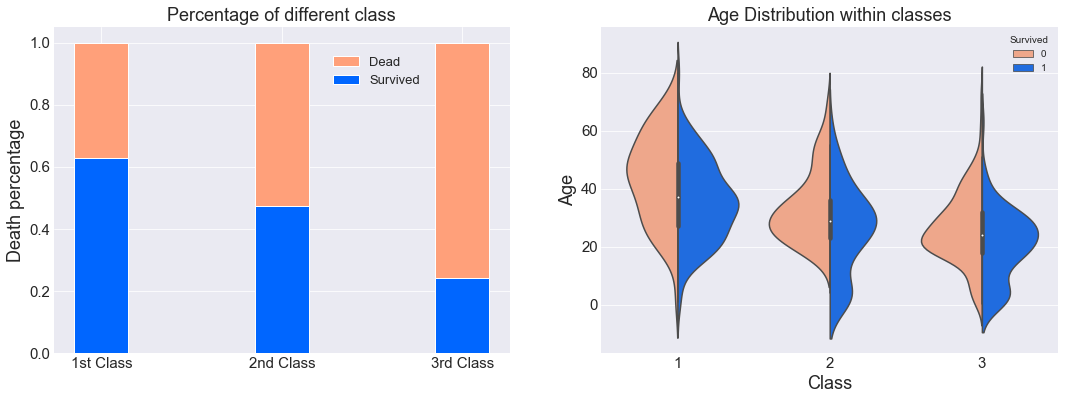

In [268]:
fig = plt.figure(figsize=(18,6))
# plots a kernel density estimate of the subset of the 1st class passangers's age
ax1 = fig.add_subplot(121)
df_3 = train.Survived[train.Pclass == 3].value_counts(normalize=True)[1]
df_2 = train.Survived[train.Pclass == 2].value_counts(normalize=True)[1]
df_1 = train.Survived[train.Pclass == 1].value_counts(normalize=True)[1]
plt.bar(['1st Class', '2nd Class','3rd Class'],[1,1,1],width=0.3,color='#FFA07A',label='Dead')
plt.bar(['1st Class', '2nd Class','3rd Class'],[df_1,df_2,df_3],width=0.3,color='#0066ff',label='Survived')
plt.title('Percentage of different class',size=18)
plt.ylabel('Death percentage',size=18)
plt.legend(fontsize=13,loc=(0.6,0.8))
plt.tick_params(labelsize = 15)
ax1 = fig.add_subplot(122)

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train,split=True,palette={0: "#FFA07A", 1: "#0066ff"})
plt.xlabel("Class",size=18) 
plt.ylabel("Age",size=18) 
plt.tick_params(labelsize = 15)
plt.title("Age Distribution within classes",size=18)
plt.savefig('class_age_diff.jpg',dpi=200,bbox_inches='tight')

In [269]:
 train.Sex[train.Pclass == 1][train.Survived==0].value_counts()

male      77
female     3
Name: Sex, dtype: int64

In [270]:
df_3 

0.24236252545824846

In [271]:
k=train.SibSp.value_counts()
list1=train.SibSp[train.Survived == 0].value_counts()

In [272]:
list1=list1/k

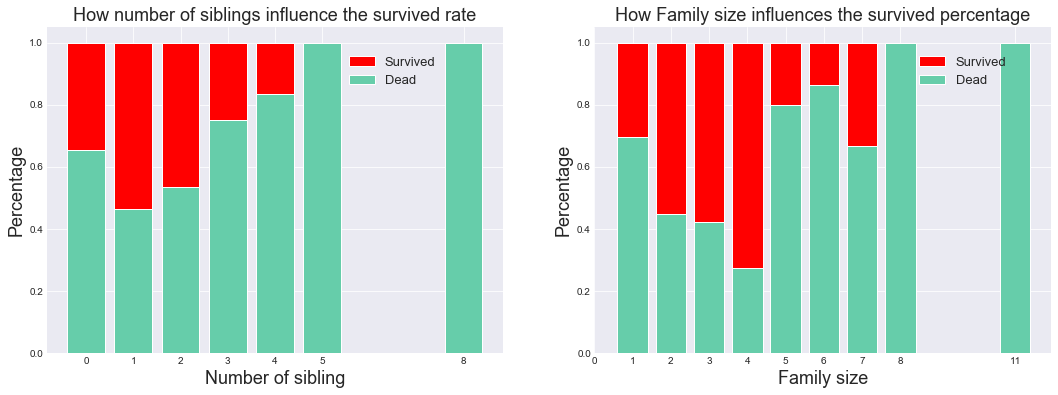

In [276]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
plt.bar([0,1,2,3,4,5,8],[1,1,1,1,1,1,1],color='#ff0000',label='Survived')
plt.bar([0,1,2,3,4,5,8],list1,color='#66CDAA',label='Dead')
plt.xticks([0,1,2,3,4,5,8])
plt.xlabel('Number of sibling',size=18)
plt.ylabel('Percentage',size=18)
plt.legend(fontsize=13,loc=(0.65,0.8))
plt.title('How number of siblings influence the survived rate',size=18)
ax1 = fig.add_subplot(122)
plt.bar([1,2,3,4,5,6,7,8,11],[1,1,1,1,1,1,1,1,1],color='#ff0000',label='Survived')
plt.bar([1,2,3,4,5,6,7,8,11],list2,color='#66CDAA',label='Dead')
plt.xticks([0,1,2,3,4,5,6,7,8,11])
plt.xlabel('Family size',size=18)
plt.ylabel('Percentage',size=18)
plt.legend(fontsize=13,loc=(0.7,0.8))
plt.title('How Family size influences the survived percentage',size=18)
plt.savefig('family.jpg',dpi=200,bbox_inches='tight')

In [274]:
train['FamilySize']=train['SibSp']+train['Parch']+1

In [275]:
k2=train.FamilySize.value_counts()
list2=train.FamilySize[train.Survived == 0].value_counts()
list2=list2/k2

In [277]:
dfs=train.Survived[train.Embarked=='S'].value_counts(normalize=True)[0]
dfc=train.Survived[train.Embarked=='C'].value_counts(normalize=True)[0]
dfq=train.Survived[train.Embarked=='Q'].value_counts(normalize=True)[0]

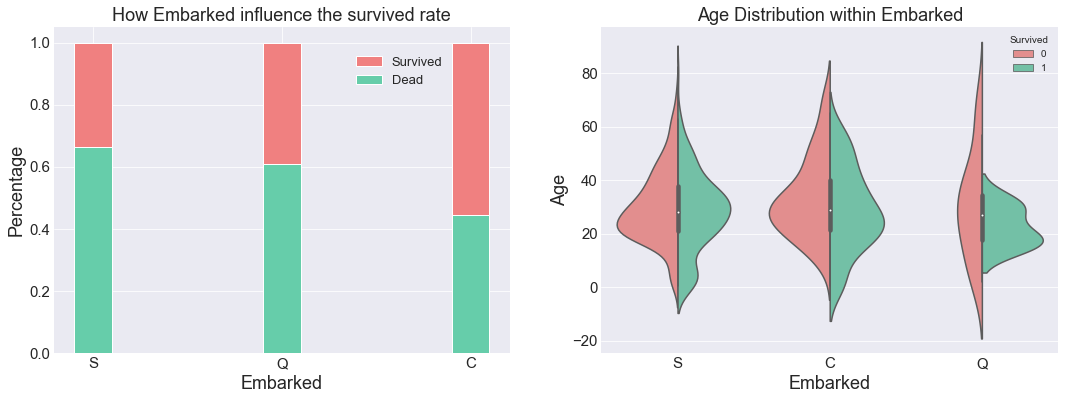

In [278]:
fig = plt.figure(figsize=(18,6))
ax1 = fig.add_subplot(121)
plt.bar(['S','Q','C'],[1,1,1],color='#F08080',label='Survived',width=0.2)
plt.bar(['S','Q','C'],[dfs,dfq,dfc],color='#66CDAA',label='Dead',width=0.2)
plt.xlabel('Embarked',size=18)
plt.ylabel('Percentage',size=18)
plt.tick_params(labelsize = 15)
plt.legend(fontsize=13,loc=(0.65,0.8))
plt.title('How Embarked influence the survived rate',size=18)
ax1 = fig.add_subplot(122)

sns.violinplot(x='Embarked', y='Age', hue='Survived', data=train,split=True,palette={0: "#F08080", 1: "#66CDAA"})
plt.xlabel("Embarked",size=18) 
plt.ylabel("Age",size=18) 
plt.tick_params(labelsize = 15)
plt.title("Age Distribution within Embarked",size=18)
plt.savefig('embarked.jpg',dpi=200,bbox_inches='tight')

In [279]:
train['Split'] = train['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
train['Split'] = train['Split'].replace(['Mme','Ms'],'Mrs')
train['Split'] = train['Split'].replace(['Mlle'],'Miss')
train['Split'] = train['Split'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady','Jonkheer'],'Roy')
train['Split'] = train['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')
train['Split'] = train['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')

# Combine data

In [280]:
target = train.Survived

In [281]:
train.drop(['Survived'], 1, inplace=True)

In [282]:
train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Split
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr


In [284]:
combined = train.append(test)
combined.reset_index(inplace=True)
combined.drop(['index'], inplace=True, axis=1)

# mapping sex 

In [285]:
combined['Sex'] = combined['Sex'].map({'male':1, 'female':0})

# Cabin

In [286]:
combined.loc[combined.Cabin.isnull(), 'Cabin'] = 'U'
for i in range(len(combined.Cabin)):
    if combined.Cabin[i] != 'U':
        combined.Cabin[i]=combined.Cabin[i][0]

In [287]:
combined.Cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

# Split title

In [288]:
combined['Split'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())

In [289]:
combined['Split'] = combined['Split'].replace(['Mme','Ms'],'Mrs')
combined['Split'] = combined['Split'].replace(['Mlle'],'Miss')
combined['Split'] = combined['Split'].replace(['Don', 'Sir', 'the Countess', 'Dona', 'Lady','Jonkheer'],'Roy')
combined['Split'] = combined['Split'].replace(['Rev', 'Dr', 'Col', 'Major', 'Capt',''],'Stuff')

In [290]:
combined.Split.value_counts()

Mr        757
Miss      262
Mrs       200
Master     61
Stuff      23
Roy         6
Name: Split, dtype: int64

# Embark

In [291]:
combined[combined.Embarked.isnull().values==True]

,Age,Cabin,Embarked,FamilySize,Fare,Name,Parch,Pclass,Sex,SibSp,Split,Ticket
61,38.0,B,NaN,1.0,80.0,"Icard, Miss. Amelie",0,1,0,0,Miss,113572
829,62.0,B,NaN,1.0,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,0,0,Mrs,113572


In [292]:
# combined['Embarked'].fillna('S',inplace=True)
combined['Embarked'].fillna('C',inplace=True)

# Family

In [293]:
combined['Fam']=combined['SibSp']+combined['Parch']+1


In [294]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) or (s == 1):
        return 1
    else:
        return 0

In [295]:
Fam_Co = dict(combined['Fam'].value_counts())
combined['Fam_con']=combined['Fam'].apply((Fam_label))

In [296]:
combined['Fam_con'].value_counts()

1    853
2    437
0     19
Name: Fam_con, dtype: int64

# Fare

In [297]:
combined['Fare'].fillna(combined[(combined['Embarked'] == 'S') & (combined['Pclass'] == 1)].Fare.median(),inplace=True)

# Age

In [298]:
combined[combined.Age.isnull().values==True]

,Age,Cabin,Embarked,FamilySize,Fare,Name,Parch,Pclass,Sex,SibSp,Split,Ticket,Fam,Fam_con
5,NaN,U,Q,1.0,8.4583,"Moran, Mr. James",0,3,1,0,Mr,330877,1,1
17,NaN,U,S,1.0,13.0000,"Williams, Mr. Charles Eugene",0,2,1,0,Mr,244373,1,1
19,NaN,U,C,1.0,7.2250,"Masselmani, Mrs. Fatima",0,3,0,0,Mrs,2649,1,1
26,NaN,U,C,1.0,7.2250,"Emir, Mr. Farred Chehab",0,3,1,0,Mr,2631,1,1
28,NaN,U,Q,1.0,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,0,0,Miss,330959,1,1
29,NaN,U,S,1.0,7.8958,"Todoroff, Mr. Lalio",0,3,1,0,Mr,349216,1,1
31,NaN,B,C,2.0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,1,0,1,Mrs,PC 17569,2,2
32,NaN,U,Q,1.0,7.7500,"Glynn, Miss. Mary Agatha",0,3,0,0,Miss,335677,1,1
36,NaN,U,C,1.0,7.2292,"Mamee, Mr. Hanna",0,3,1,0,Mr,2677,1,1
42,NaN,U,C,1.0,7.8958,"Kraeff, Mr. Theodor",0,3,1,0,Mr,349253,1,1


In [299]:
begin = combined[['Age', 'Pclass','Sex','Split']]
begin  = pd.get_dummies(begin)
ageyes = begin[begin.Age.notnull()].as_matrix()
ageno = begin[begin.Age.isnull()].as_matrix()

In [300]:
from sklearn.ensemble import RandomForestRegressor
y_want = ageyes[:, 0]
X_want = ageyes[:, 1:]
    
random_f = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
random_f.fit(X_want, y_want)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [301]:
predictedAges = random_f.predict(ageno[:, 1::])

In [302]:
combined.loc[ (combined.Age.isnull()), 'Age' ] = predictedAges

# Ticket

In [303]:
Ticket_Co = dict(combined['Ticket'].value_counts())
combined['Ticket_con']=combined['Ticket'].apply(lambda x:Ticket_Co[x])

In [304]:
def Ticket_La(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) or (s == 1):
        return 1
    else:
        return 0

combined['Ticket_con'] = combined['Ticket_con'].apply(Ticket_La)

In [305]:
combined.Ticket_con.value_counts()

1    823
2    475
0     11
Name: Ticket_con, dtype: int64

# Fname

In [306]:
combined['Fname']=combined['Name'].apply(lambda x:x.split(',')[0].strip())

In [307]:
combined.head()

,Age,Cabin,Embarked,FamilySize,Fare,Name,Parch,Pclass,Sex,SibSp,Split,Ticket,Fam,Fam_con,Ticket_con,Fname
0,22.0,U,S,2.0,7.2500,"Braund, Mr. Owen Harris",0,3,1,1,Mr,A/5 21171,2,2,1,Braund
1,38.0,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,1,Mrs,PC 17599,2,2,2,Cumings
2,26.0,U,S,1.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,Miss,STON/O2. 3101282,1,1,1,Heikkinen
3,35.0,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,1,Mrs,113803,2,2,2,Futrelle
4,35.0,U,S,1.0,8.0500,"Allen, Mr. William Henry",0,3,1,0,Mr,373450,1,1,1,Allen


In [308]:
combined_1=combined[['Pclass','Sex','Age','Fare','Embarked','Cabin','Fam_con','Split','Ticket_con']]

In [309]:
combined_1=pd.get_dummies(combined_1)

In [310]:
train_final=combined_1[:891]
test_final=combined_1[891:]

In [311]:
train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
Pclass          891 non-null int64
Sex             891 non-null int64
Age             891 non-null float64
Fare            891 non-null float64
Fam_con         891 non-null int64
Ticket_con      891 non-null int64
Embarked_C      891 non-null uint8
Embarked_Q      891 non-null uint8
Embarked_S      891 non-null uint8
Cabin_A         891 non-null uint8
Cabin_B         891 non-null uint8
Cabin_C         891 non-null uint8
Cabin_D         891 non-null uint8
Cabin_E         891 non-null uint8
Cabin_F         891 non-null uint8
Cabin_G         891 non-null uint8
Cabin_T         891 non-null uint8
Cabin_U         891 non-null uint8
Split_Master    891 non-null uint8
Split_Miss      891 non-null uint8
Split_Mr        891 non-null uint8
Split_Mrs       891 non-null uint8
Split_Roy       891 non-null uint8
Split_Stuff     891 non-null uint8
dtypes: float64(2), int64(4), uint8(18)
memory usag

# Result

In [312]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectKBest
# from sklearn import cross_validation, metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# 79% 

In [313]:
pipe=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'auto'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(train_final,target)
print(gsearch.best_params_, gsearch.best_score_)

{'classify__max_depth': 6, 'classify__n_estimators': 48} 0.8748059112091594


In [314]:
select = SelectKBest(k = 24)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 24,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(train_final,target)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=24,
                             score_func=<function f_classif at 0x1a2642ad90>)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=6,
                                        max_features='sqrt',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=24, n_jobs=None,
                                        oob_score=False, random_state=10,
                                        verbose=0, warm_start=True))],
         verbose=False

In [315]:
predictions = pipeline.predict(test_final)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)

# 77%

# Logistic

In [45]:
pipe_1=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', LogisticRegression(random_state = 10) )])
param_test_1 = {'classify__max_iter':list(range(80,120,2)), }
gsearch_1 = GridSearchCV(estimator = pipe_1, param_grid = param_test_1, scoring='roc_auc', cv=10)
gsearch_1.fit(train_final,target)
print(gsearch_1.best_params_, gsearch_1.best_score_)

{'classify__max_iter': 80} 0.8612653586641835


In [46]:
select_1 = SelectKBest(k = 24)
clf_1 = LogisticRegression(random_state = 10,max_iter=80)
pipeline_1 = make_pipeline(select, clf_1)
pipeline_1.fit(train_final,target)

Pipeline(memory=None,
         steps=[('selectkbest',
                 SelectKBest(k=24,
                             score_func=<function f_classif at 0x1a206e8ae8>)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=80,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=10,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

# Desicion tree

In [517]:
predictions_1 = pipeline_1.predict(test_final)
submission_1 = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions_1.astype(np.int32)})
submission_1.to_csv("submission_1.csv", index=False)

In [316]:
from sklearn.tree import DecisionTreeClassifier
pipe_2=Pipeline([('select',SelectKBest(k=24)), 
               ('classify', DecisionTreeClassifier(random_state = 10) )])
param_test_2 = {'classify__max_depth':list(range(3,60,3)), }
gsearch_2 = GridSearchCV(estimator = pipe_2, param_grid = param_test_2, scoring='roc_auc', cv=10)
gsearch_2.fit(train_final,target)
print(gsearch_2.best_params_, gsearch_2.best_score_)

{'classify__max_depth': 3} 0.85458036336098


# 1.3.2

In [1]:
import pandas as pd, numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats.mstats import winsorize
from sklearn.metrics import *
from sklearn.ensemble import RandomForestRegressor
plt.style.use('seaborn-darkgrid')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

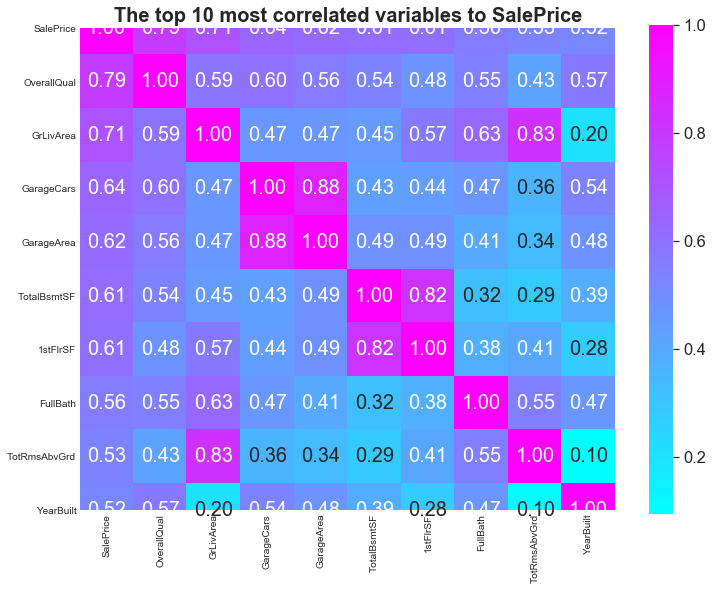

In [4]:
#saleprice correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols.values, xticklabels=cols.values,cmap=plt.get_cmap('cool'))
plt.title("The top 10 most correlated variables to SalePrice",fontsize=20,fontweight='bold')
plt.show()

In [5]:
variables = ["FullBath","GarageCars","GrLivArea","OverallQual","TotalBsmtSF","YearBuilt","SalePrice"]
select = train[variables]
select.head(3)

,FullBath,GarageCars,GrLivArea,OverallQual,TotalBsmtSF,YearBuilt,SalePrice
0,2,2,1710,7,856,2003,208500
1,2,2,1262,6,1262,1976,181500
2,2,2,1786,7,920,2001,223500


In [6]:
# print(select["FullBath"].describe())
# select["GarageCars"].describe()
# select["GrLivArea"].describe()
# select["OverallQual"].describe()
# select["TotalBsmtSF"].describe()
# select["YearBuilt"].describe()
select["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\python\Lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


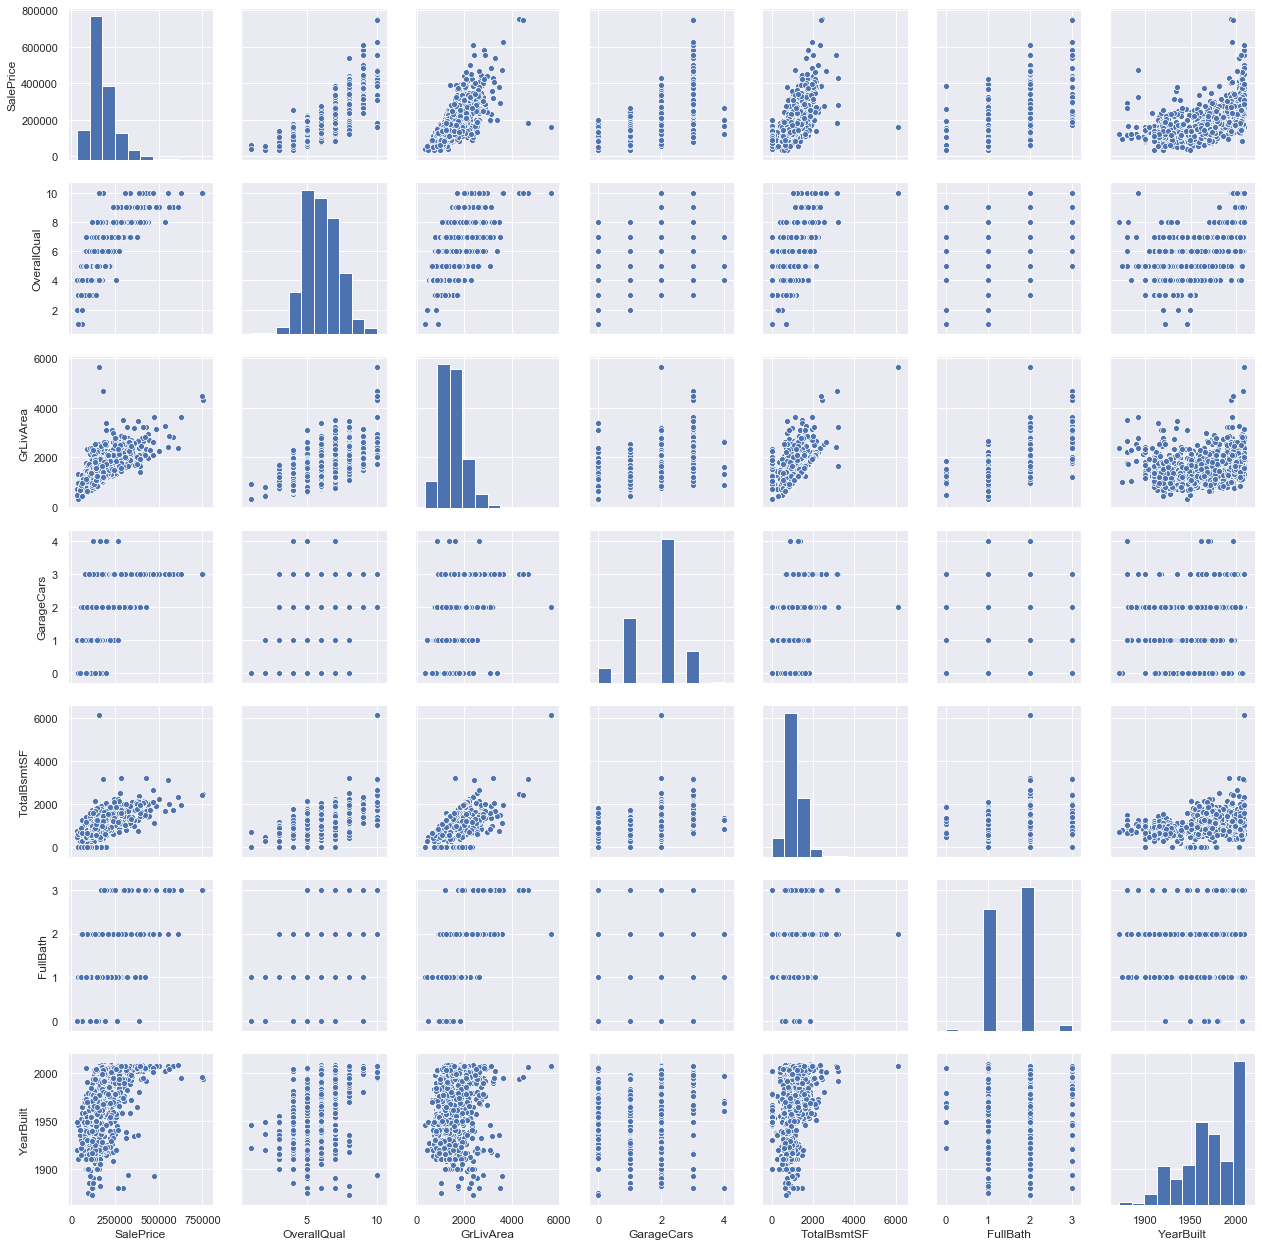

In [7]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

In [8]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Text(0.5, 1.0, 'Percent missing data by feature')

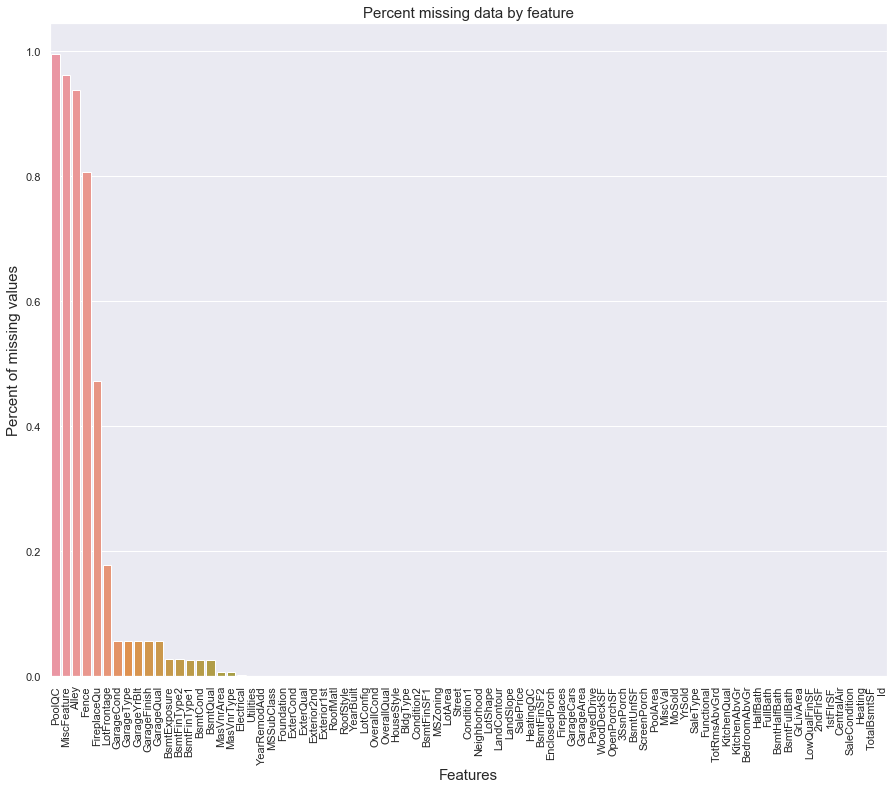

In [9]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.set(font_scale=1)
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [10]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

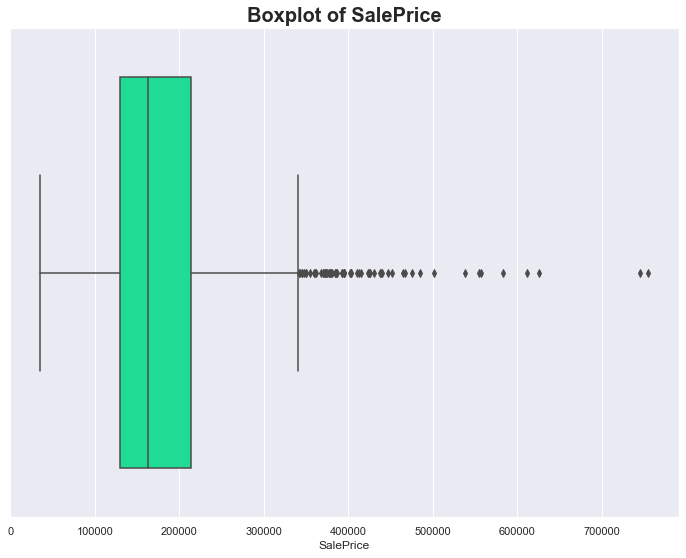

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.5)
s1 = sns.boxplot(train['SalePrice'], showfliers=True,color='mediumspringgreen' )
plt.title("Boxplot of SalePrice",fontsize=20,fontweight='bold')
plt.show()

In [12]:
q1 = np.percentile(train["SalePrice"],25)
q3 = np.percentile(train["SalePrice"],75)
iqr = q3-q1
upper = q3+1.5*iqr
lower = q1-1.5*iqr
lower, upper

(3937.5, 340037.5)

In [13]:
train[(train["SalePrice"]>upper) | (train["SalePrice"]<lower)].shape[0]

61

In [14]:
train_select = train.loc[(train["SalePrice"]<=upper) & (train["SalePrice"]>=lower)]

In [15]:
train_select.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000
99,100,20,RL,77.0,9320,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,400,1,2010,WD,Normal,128950
100,101,20,RL,NaN,10603,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2010,WD,Normal,205000
101,102,60,RL,77.0,9206,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,178000


In [16]:
len(train_select)

1399

In [19]:
variable = ["FullBath","GarageCars","GrLivArea","OverallQual","TotalBsmtSF","YearBuilt"]
X_d = train_select[variable].values
Y_d = train_select["SalePrice"].values
X_train_d, X_test_d, Y_train_d, Y_test_d = train_test_split(X_d, Y_d, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train_d, Y_train_d)
#regressor.coef_
coeff_df = pd.DataFrame(regressor.coef_, train[variable].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
FullBath,-231.690869
GarageCars,13883.353027
GrLivArea,39.649824
OverallQual,16061.279223
TotalBsmtSF,14.110071
YearBuilt,386.324175


## Linear Regression

In [29]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [30]:
variable = ["FullBath","GarageCars","GrLivArea","OverallQual","TotalBsmtSF","YearBuilt"]
X = train[variable].values
Y = train["SalePrice"].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, Y_train)
#regressor.coef_
coeff_df = pd.DataFrame(regressor.coef_, train[variable].columns, columns=['Coefficient'])  
coeff_df

,Coefficient
FullBath,-7891.237187
GarageCars,12949.394806
GrLivArea,60.003773
OverallQual,18462.578939
TotalBsmtSF,40.971339
YearBuilt,367.569730


In [31]:
regressor.intercept_

-800879.9990063794

In [32]:
Y_pred = regressor.predict(X_test)
prediction = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})

Text(0, 0.5, 'SalePrice')

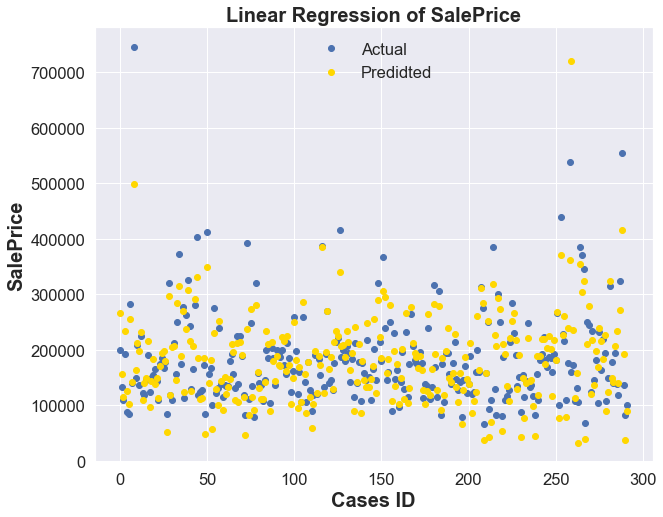

In [33]:
plt.figure(figsize=(10,8))
plt.plot(Y_test,'o',label='Actual')
plt.plot(Y_pred,'o',label='Predidted',color='gold')
plt.legend()
plt.title('Linear Regression of SalePrice',fontweight='bold',fontsize='20')
plt.xlabel('Cases ID',fontweight='bold',fontsize='20')
plt.ylabel('SalePrice',fontweight='bold',fontsize='20')

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))

Mean Absolute Error: 26673.45453404929
Mean Squared Error: 2420579321.9917383


In [35]:
Y_pred_d = regressor.predict(X_test_d)
prediction_d = pd.DataFrame({'Actual': Y_test_d, 'Predicted': Y_pred_d})

(0, 400000)

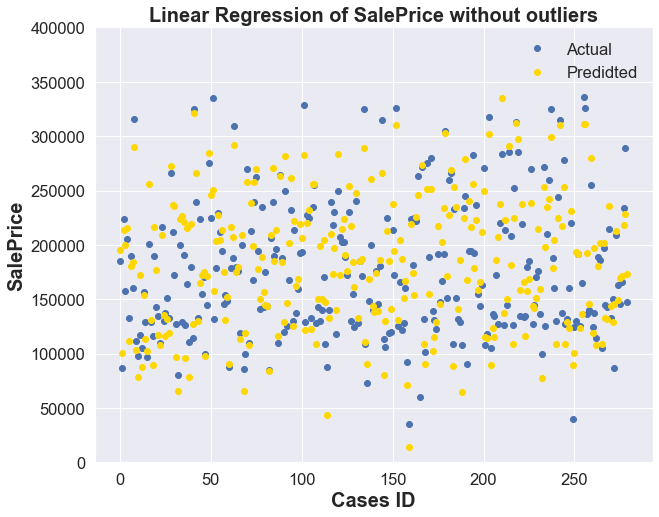

In [36]:
plt.figure(figsize=(10,8))
plt.plot(Y_test_d,'o',label='Actual')
plt.plot(Y_pred_d,'o',label='Predidted',color='gold')
plt.legend()
plt.title('Linear Regression of SalePrice without outliers',fontweight='bold',fontsize='20')
plt.xlabel('Cases ID',fontweight='bold',fontsize='20')
plt.ylabel('SalePrice',fontweight='bold',fontsize='20')
plt.ylim(0,400000)

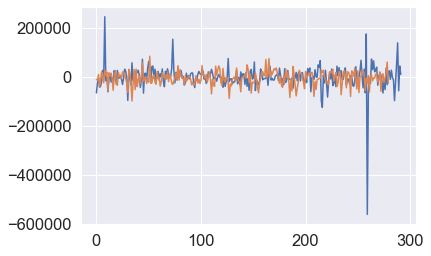

In [37]:
plt.plot(Y_test-Y_pred)
plt.plot(Y_test_d-Y_pred_d)

In [38]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_d, Y_pred_d))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_d, Y_pred_d))

Mean Absolute Error: 22202.919390485138
Mean Squared Error: 847379856.7582626


## Random Forest Regression

In [35]:
X_train_f, X_test_f, Y_train_f, Y_test_f = train_test_split(X, Y, test_size=0.2, random_state=0)
rf = RandomForestRegressor()
rf.fit(X_train_f,Y_train_f)
Y_pred_f = rf.predict(X_test_f)

C:\python\Lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0, 400000)

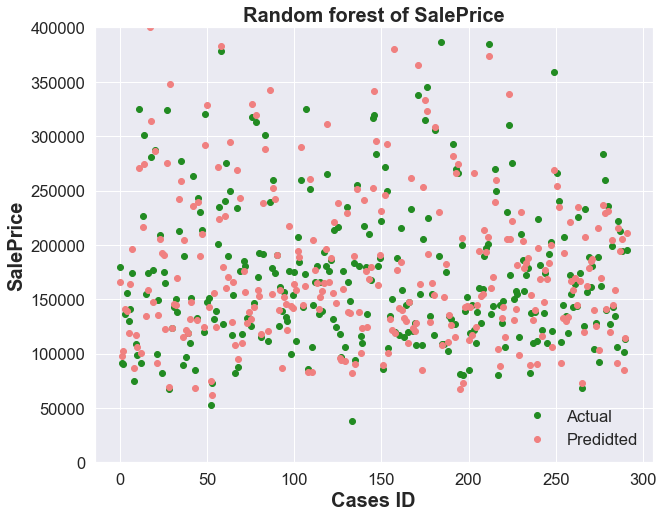

In [36]:
plt.figure(figsize=(10,8))
plt.plot(Y_test_f,'o',label='Actual',color='forestgreen')
plt.plot(Y_pred_f,'o',label='Predidted',color='lightcoral')
plt.legend()
plt.title('Random forest of SalePrice',fontweight='bold',fontsize='20')
plt.xlabel('Cases ID',fontweight='bold',fontsize='20')
plt.ylabel('SalePrice',fontweight='bold',fontsize='20')
plt.ylim(0,400000)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_f, Y_pred_f))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_f, Y_pred_f))

Mean Absolute Error: 20620.85799086758
Mean Squared Error: 952277793.5457553


In [38]:
X_train_f_d, X_test_f_d, Y_train_f_d, Y_test_f_d = train_test_split(X_d, Y_d, test_size=0.2, random_state=0)
rf = RandomForestRegressor()
rf.fit(X_train_f_d,Y_train_f_d)
Y_pred_f_d = rf.predict(X_test_f_d)

C:\python\Lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0, 400000)

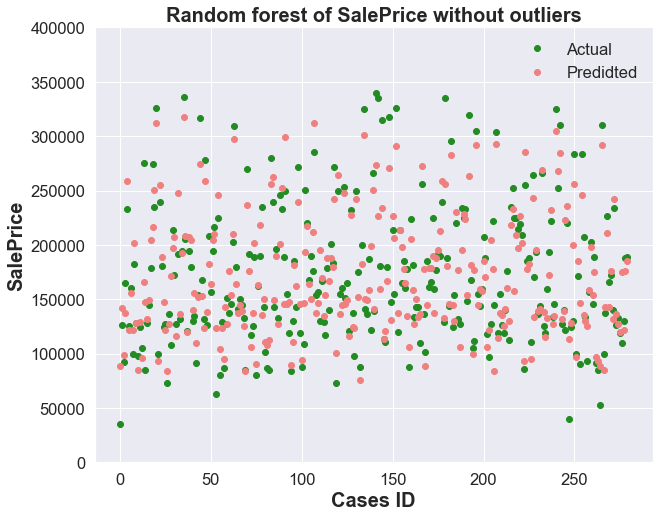

In [39]:
plt.figure(figsize=(10,8))
plt.plot(Y_test_f_d,'o',label='Actual',color='forestgreen')
plt.plot(Y_pred_f_d,'o',label='Predidted',color='lightcoral')
plt.legend()
plt.title('Random forest of SalePrice without outliers',fontweight='bold',fontsize='20')
plt.xlabel('Cases ID',fontweight='bold',fontsize='20')
plt.ylabel('SalePrice',fontweight='bold',fontsize='20')
plt.ylim(0,400000)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test_f_d, Y_pred_f_d))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test_f_d, Y_pred_f_d))

Mean Absolute Error: 20460.08361394558
Mean Squared Error: 825145266.0756017


# 1.3.3

In [3]:
sms=pd.read_csv('./datamining1/assignment1/SmsCollection.csv',sep='delimiter')

In [4]:
#先复制原来的列
sms["att"] = sms["label;text"].map(lambda x:x.split(';')[0]) #分别处理新旧两列
sms["text"] = sms["label;text"].map(lambda x:x.split(';')[1])

In [5]:
sms=sms.drop(['label;text'],axis=1)

In [6]:
sms['att']=sms['att'].map({'ham':1, 'spam':0})

In [13]:
sms.head()

,att,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sms.text.values, sms.att.values,
                                                    stratify= sms.att.values, test_size=0.2,
                                                    random_state=50)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import GridSearchCV
nltk.download('punkt')

vector = TfidfVectorizer()
param = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize],
               'clf__C': [1.0, 10.0, 100.0]}
             ]

lr = Pipeline([('vect', vector),
                     ('clf', LogisticRegression(random_state=10))])

log = GridSearchCV(lr, param,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

log.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/hernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   19.3s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

### Logic Regression

In [16]:
import sklearn
clf_logis = log.best_estimator_
prediction_1=clf_logis.predict(X_test)
print('Accuracy, F1',clf_logis.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_1))

Accuracy, F1 0.989237668161435 0.9938144329896906


In [17]:
log.best_params_

{'clf__C': 100.0,
 'vect__stop_words': None,
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>}

### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
sms.head()

,att,text
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vector = TfidfVectorizer()
param = [{
               'vect__stop_words': [stopwords.words(), None],
               'vect__tokenizer': [word_tokenize],
               'clf__alpha': [1, 1e-1, 1e-2]}
             ]

bys = Pipeline([('vect', vector),
                     ('clf', MultinomialNB())])

bayes = GridSearchCV(bys, param,scoring='accuracy',
                           cv=10, verbose=1, n_jobs=-1)

bayes.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.8s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [20]:
clf_bayes = bayes.best_estimator_
prediction_2=clf_bayes.predict(X_test)
print('Accuracy, F1',clf_bayes.score(X_test, y_test),sklearn.metrics.f1_score(y_test,prediction_2))

Accuracy, F1 0.9883408071748879 0.9933093154915079


In [21]:
bayes.best_params_

{'clf__alpha': 0.01,
 'vect__stop_words': None,
 'vect__tokenizer': <function nltk.tokenize.word_tokenize(text, language='english', preserve_line=False)>}

## Topic modelling

In [7]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from gensim.matutils import Sparse2Corpus
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import average_precision_score, confusion_matrix
import os

unable to import 'smart_open.gcs', disabling that module


In [8]:
limit = int(0.9*len(sms))
train = sms.loc[:limit]
test = sms.loc[limit:]

In [9]:
vectorizer = CountVectorizer(stop_words="english", 
                             ngram_range=(1, 3))
term_document_matrix = vectorizer.fit_transform(train.text)
corpus = Sparse2Corpus(term_document_matrix, documents_columns=False)
id2word = {value: key for key, value in vectorizer.vocabulary_.items()}
model = LdaModel(corpus=corpus, 
                 id2word=id2word, 
                 random_state=0)

def transform_messages_to_topic_vectors(data, vectorizer, model):
    num_topics = model.num_topics
    message_topics = pd.DataFrame(index=map(str, range(num_topics)))    
    for index, message in data.text.iteritems():
        message_transformed = (vectorizer.transform([message]))
        message_corpus = (Sparse2Corpus(message_transformed, documents_columns=False))
        topics_framework = dict.fromkeys(map(str, range(0, num_topics)))
        topics_specific = dict(list(model[message_corpus])[0])
        for key in topics_specific:
            topics_framework[str(key)] = topics_specific[key]
        message_topics[index] = pd.Series(topics_framework)
    message_topics = message_topics.T.fillna(0)
    data = data.join(message_topics)
    data.drop("text", axis=1, inplace=True)
    data = pd.get_dummies(data, drop_first=True)
    data.rename(columns=dict(Class_spam="Spam"), inplace=True)
    return data


train = transform_messages_to_topic_vectors(train, vectorizer, model)
test = transform_messages_to_topic_vectors(test, vectorizer, model)
train.head()

,att,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.064217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.080169,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


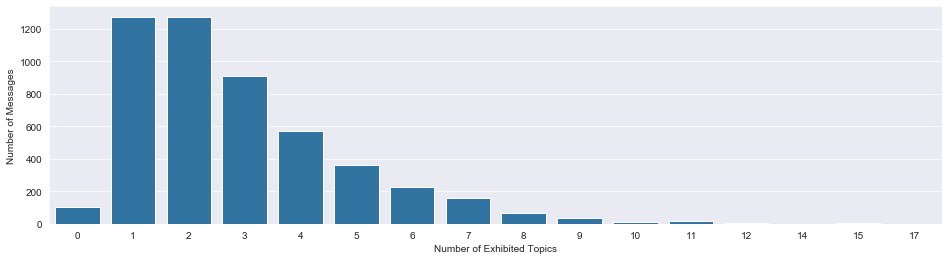

In [74]:
topics = list(train.columns)
topics.remove("att")
ax = sns.countplot(train[topics].astype(bool).sum(axis=1), color="C0")
ax.set_xlabel("Number of Exhibited Topics")
ax.set_ylabel("Number of Messages")
fig = plt.gcf()
fig.set_size_inches(16, 4)

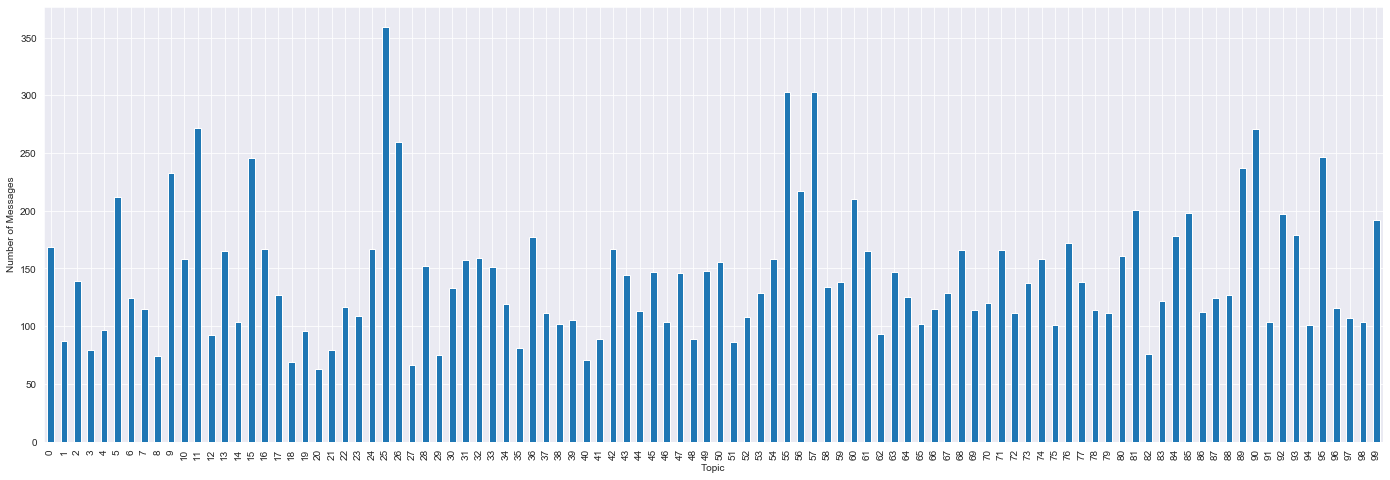

In [75]:
ax = train[topics].astype(bool).sum(axis=0).plot.bar(color="C0")
ax.set_xlabel("Topic")
ax.set_ylabel("Number of Messages")
fig = plt.gcf()
fig.set_size_inches(24, 8)

In [76]:
print("The most prevalent ngrams in the most prevalent topic are:\n- {}".format('\n- '.join([id2word[term[0]] for term in model.get_topic_terms(50)])))

The most prevalent ngrams in the most prevalent topic are:
- bus
- boy
- weeks
- stop
- online
- min
- love
- grins
- voucher
- pain


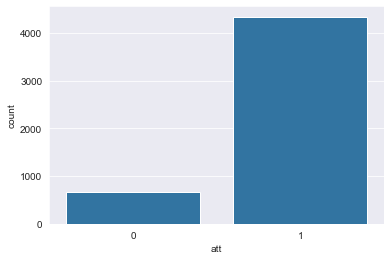

In [10]:
X_train = train.drop("att", axis=1)
Y_train = train.att
X_test = test.drop("att", axis=1)
Y_test = test.att
sns.countplot(Y_train, color="C0")

In [13]:
print("Number of spam messages in the test set: {}"\
      .format(test["att"].value_counts()[0]))

Number of spam messages in the test set: 72


In [11]:
scaler = StandardScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_test[X_test.columns] = scaler.transform(X_test)

In [12]:
param_grid = dict(C=np.logspace(-3, 3, 7))
best_C_linear = GridSearchCV(LinearSVC(class_weight="balanced", random_state=0), 
                             param_grid, 
                             cv=5).fit(X_train, Y_train)\
                                  .best_params_["C"]
print("The best value for the tuning parameter 'C' is {}.".format(best_C_linear))

The best value for the tuning parameter 'C' is 100.0.


In [17]:
svm_linear = LinearSVC(C=best_C_linear, 
                       random_state=0, 
                       max_iter=1e5).fit(X_train, Y_train)

In [15]:
priors = list(train.att.value_counts().div(train.att.value_counts().sum()))
nb = GaussianNB(priors).fit(X_train, Y_train)

In [18]:
svm_linear_score = svm_linear.score(X_test, Y_test)
nb_score = nb.score(X_test, Y_test)

print("The linear SVM has a test accuracy score of {:.3f}.".format(svm_linear_score))
print("The Gaussian naive Bayes classifer has a test accuracy score of {:.3f}."\
      .format(nb_score))


The linear SVM has a test accuracy score of 0.907.
The Gaussian naive Bayes classifer has a test accuracy score of 0.676.
